# Gradient Descent

Assuming that the file [dataset-guide.ipynb](https://github.com/imAlessas/machine-learning/blob/main/algorithms/dataset-guide.ipynb) has been read, let's dive into the Gradient Descend approach.

### Theoretical Aspects

The idea behind the Gradient Descent approach is to try to minimize the in-sample error $E_{\text{IN}}$ of a hypothesis $h(x)$ with the objective that the out-sample error $E_{\text{OUT}}$ will be minimized too. Let's define the $E_{\text{IN}}$ as the Sum of Squared Errors (also called by its acronym $SSE$):
$$
    E_{\text{IN}}(h) =  \frac{1}{N}\sum_{i = 0}^N \left[ f(X_i) - h(X_i) \right]^2
$$

In the GD approach, we are changing the __activation function__ $\Phi$. The activation function is that function whose output lets the algorithm know if there is an error or not. In the perceptron, the activation function was the sign function; here we use the identity function as follows:
$$
h(X_i) = \Phi(X_i) = w^TX_i
$$
Meaning that now the error function can be rewritten as follows:
$$
    E_{\text{IN}}(w) =  \frac{1}{N}\sum_{i = 0}^N \left[ y_i - w^TX_i \right]^2
$$
Now the question follows: in order to minimize the error function $E_{\text{IN}}(w)$, how shall we chose the optimal weight $w$? Let's hypothesize that the error function $E_{\text{IN}}(w)$ is a parabola, like the plot shown below. How can we be sure that we are approaching the absolute minimum? We can use the first derivative of a function, called __gradient__ for  $>1$-variable function.

By observing the parabola, in the points $E_{\text{IN}}(w_1)$ and $E_{\text{IN}}(w_2)$, we can see that the derivative of $E_{\text{IN}}(w)$ is computed. In the case of $w_1$, to reach the minimum, is necessary to add something meanwhile in the case of $w_2$, something shall be subtracted.

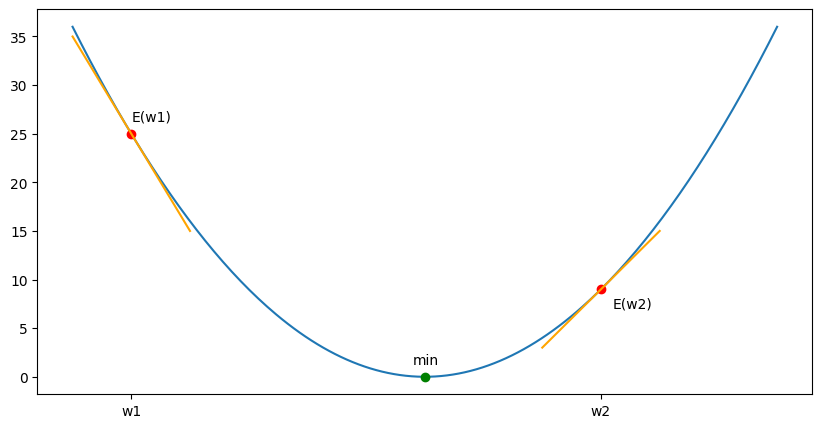

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.linspace(-6, 6, 240)
y = x**2

# plot parabola
plt.figure(figsize=(10, 5))
plt.plot(x, y)

# insert fixed points
plt.xticks([-5, 3], ['w1', 'w2'])
plt.plot([-5, 3], [25, 9], 'ro')

# label points in the curve
plt.text(-5, 26, 'E(w1)', ha='left', va='bottom')
plt.text(3.2, 6.8, 'E(w2)', ha='left', va='bottom')

# insert min error
plt.plot([0], [0], 'go')
plt.text(- 0.2, 1, 'min', va='bottom')

# plot derivative
x = np.linspace(-6, -4, 50)
plt.plot(x, -10 * x - 25, color = "orange")

x = np.linspace(2, 4, 50)
plt.plot(x, 6 * x - 9, color = "orange")

By making this observation, we can say that the updated rule of the weight will be:
$$
\boxed{w_\text{NEW} = w_\text{OLD} - \eta\nabla E_{\text{IN}}(w)}
$$
In such a way, if the gradient is negative, it means that we should 'jump' right so we are subtracting the negative value (hence adding it), meanwhile if the gradient is positive, we shall subtract the positive value to jump left. Furthermore, it is important to observe that the more the weight $w$ is closer to the minimum, the smaller the gradient will be, meaning that the steps will be increasingly smaller, making the model more precise.

#### Local minima problem

Using the gradient may also lead to local minima instead of absolute minima (as shown in the plot). This problem can be solved by using some sort of randomized approach. For example, let's see this problem from another perspective, a more childish one. Let's hypnotize we have a marble, the thing the GD tries to do is to put the marble anywhere in the $d$-dimensional error function and make it reach the minimum. Consequently, by putting the marble in different places, different times might lead to different minima and there is a higher chance to get to the absolute. 

In the plot shown below, if the weight $w > 2$, then the absolute minima is reached meanwhile if $w < -2$, the GD stops at a local minima.

Text(1.65, -13.37, 'abs')

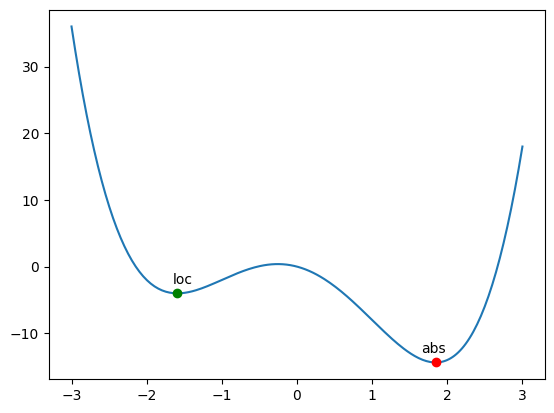

In [2]:
x = np.linspace(-3, 3, 240)
y = (x**4) - (6 * x**2) - (3 * x)

plt.plot(x, y)

# insert local minima
plt.plot([-1.59], [-4], 'go')
plt.text(-1.65, -3, 'loc', va='bottom')

# insert absolute minima
plt.plot([1.85], [-14.37], 'ro')
plt.text(1.65, -13.37, 'abs', va='bottom')

### Marble POV



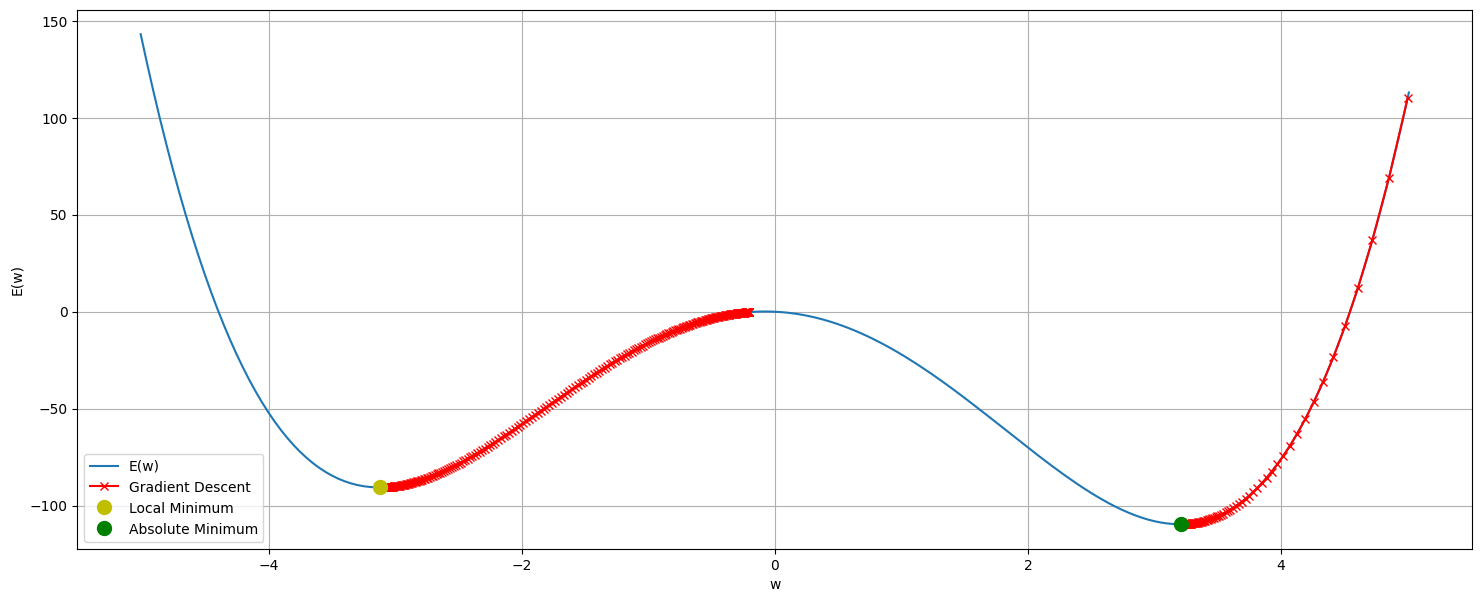

In [3]:
# function and its derivative
def f(x):
    return (x**4) - (20 * x**2) - (3 * x)

def df(x):
    return 4 * (x ** 3) - 40 * x - 3

# gradient descent plotting function
def gradient_descent(x_init, learning_rate, num_iters):
    x_history = [x_init]
    for i in range(num_iters):
        x = x_history[-1]
        x_new = x - learning_rate * df(x)
        x_history.append(x_new)
    return x_history

# initial parameters
learning_rate = 5e-4
num_iters = 100

# first plot
plt.figure(figsize=(18, 7))

# plot the error function 
x_vals = np.linspace(-5.01, 5.01, 200)
plt.plot(x_vals, f(x_vals), label='E(w)')



# GD for local minimum
x_init = -0.2
x_history = gradient_descent(x_init, learning_rate, 3 * num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-', label='Gradient Descent')

# insert local minima
min = x_history[-1]
plt.plot(min, f(min), 'yo', markersize=10, label='Local Minimum')



# GD for absolute minima
x_init = 5
x_history = gradient_descent(x_init, learning_rate, num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-')

# insert absolute minima
min = x_history[-1]
plt.plot(min, f(min), 'go', markersize=10, label='Absolute Minimum')


# general settings
plt.xlabel('w')
plt.ylabel('E(w)')
plt.legend()
plt.grid()

We can zoom into absolute minima

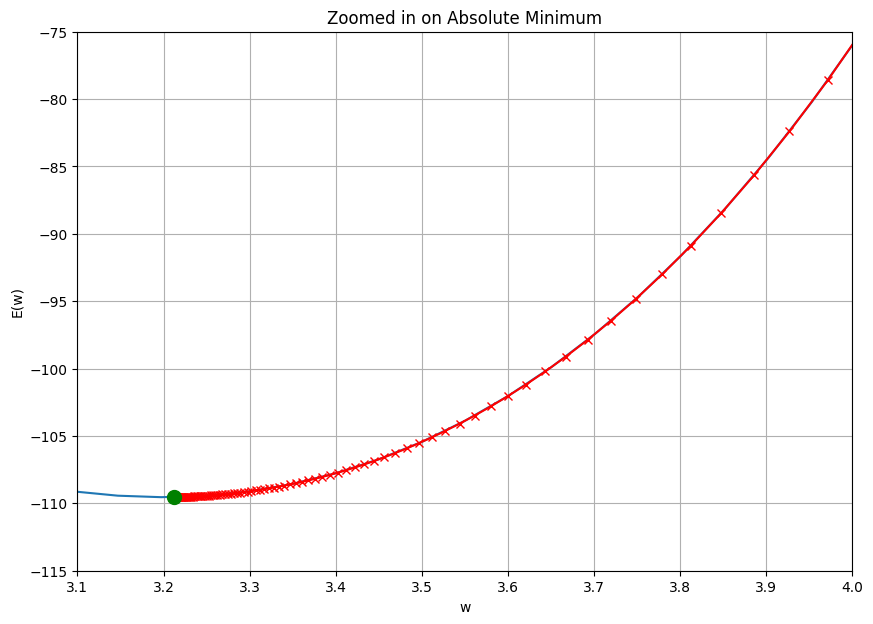

In [4]:
plt.figure(figsize=(10, 7))

# limit the view
plt.xlim(3.1, 4)
plt.ylim(-115, -75)

# plot error function
plt.plot(x_vals, f(x_vals))

# plot GD
plt.plot(x_history, [f(x) for x in x_history], 'rx-')

# insert abs minima
plt.plot(min, f(min), 'go', markersize=10)

# general settings
plt.xlabel('w')
plt.ylabel('E(w)')
plt.title('Zoomed in on Absolute Minimum')
plt.grid()

# Implementation

The initial setup of this algorithm is nearly identical to others' initial setup. The comments provided on the Python code should be auto-explanatory, but you can see the [PLA-basic notebook](https://github.com/imAlessas/neural-networks/blob/main/algorithms/perceptron/PLA-basic.ipynb) where you can find the _initial setup_ properly explained.

[-0.81106858 -0.28821376 -0.54872867]
Norm of w: 1.020785271648198


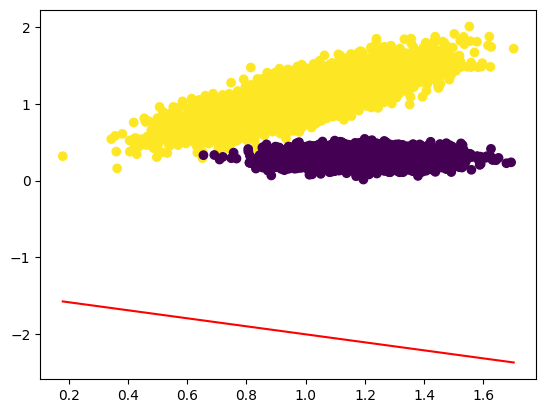

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

# generate N points per class
N = 5000

# first components of X1 and X2
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1

# generate labels
Y1 = np.ones(N)

# second components of X1 and X2
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)

# generate labels
Y2 = -np.ones(N)

# plots the components
# plt.scatter(X1_1, X2_1)
# plt.scatter(X1_2, X2_2)

# generates weight vector w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print("Norm of w: " + str(np.linalg.norm(w)))

# Plots the hyperplane
plt.plot([np.min(X1_1), np.max(X1_1)],
        [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]],
        color = 'red')


# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

#  creates the final set of point X1 and X2
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

# y.shape[0]

### Error function

In this case, the error function is the mathematical definition of the _Sum Squared Error_ which translates into the following mathematical summation:

$$
    \frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2
$$

In [6]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

## Training script

Before entering the loop to train the Adeline network we generate a weight vector $w$, we set the learning rate $\eta$, and then we initialize the variables <tt>epochs</tt> - which counts the iterations - and <tt>max_epochs</tt> - which is the maximum number of iterations allowed. Then we initialize the array <tt>total_error</tt> which stores for every epoch the number of errors.


In [7]:
#np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-1, high=1, size=3)

# set learning rate 0 < eta < 1
eta = 0.01

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 2000

# track total error per epoch
total_error = np.zeros(max_epochs)

We start iterating until we reach the maximum number of epochs, we compute the <tt>output</tt> of the __activation function__, which in this case is the identity function:

$$
    \Phi(w^Tx) = w^Tx
$$

Secondly, we compute the error as the difference between the output and the labels $y$ and we use it to compute the sum of squared errors.

Remember that the Adaline output is a vector of length $N$ (number of points in the dataset) so the result of $\Phi(w^TX)\,y$ is positive if both of the values are positive or negative. So if _all_ the Adaline outputs are the same sign $y$ then we found a solution. Otherwise, we use the updating rule:

$$
    w_\text{new} = w_\text{old} - \eta\nabla E_\text{IN} \,\,=\,\, w_\text{old} + \eta x^T\,(y - x\,w)
$$

Eventually we increase the number of epochs.

<!-- <tt></tt> -->

In [8]:
while (epochs < max_epochs):
        
    # compute current output
    adaline_output = np.dot(X, w)
    
    # compute error for each data point = y - X^T w
    errors = y - adaline_output
    
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    
    # check if a solution is found
    if all(adaline_output * y > 0):
        break
    else:
        # update with w = w + delta_w
        # delta_w = eta * 2/n * X^T * (errors)
        # errors = y - X^T w
        delta_w = eta * 2 * np.dot(np.transpose(X), errors) / X.shape[0]
        w = w + delta_w
        
    epochs += 1

After computing the algorithm we can plot the solution found by de Adaline LA. If <tt>max_epochs = 1000</tt> we can observe that most of the points are correctly classified while the minority (some units) are still misclassified. In this situation the GD Adeline LA makes a lot of effort to rotate the hyperplane because the gradient $\nabla E_\text{IN}$ is very close to zero (as we can see from the second graph). By increasing the number of epochs it is possible to obtain a better solution.

Another way to speed up the learning stage is to modify the value of $\eta$, which generally goes from $10^{-2}$ to $10^{-4}$.

[ 0.09170558 -1.32746202  1.94729391]
Eta: 0.01
# of epochs:  2000


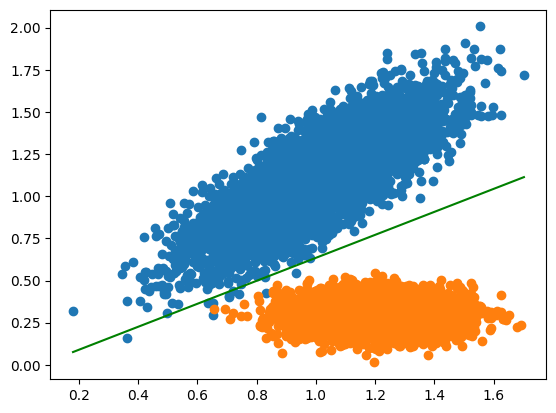

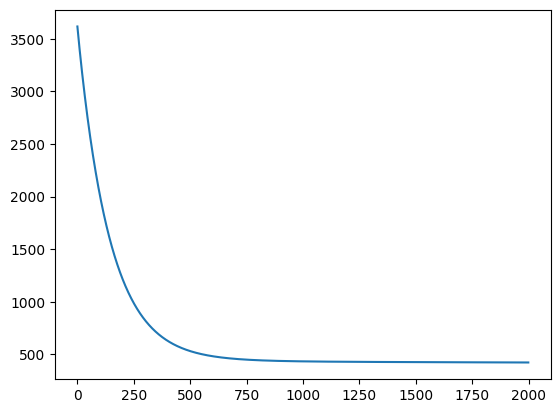

In [9]:
print(w)

# displays the points
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

print("Eta: " + str(eta))
print("# of epochs: ", epochs)

# plots the hyperplane
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

# plots the errors
plt.figure()
plt.plot(range(max_epochs), total_error)